In [1]:
import pandas as pd
import numpy as np
import html
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('dummy.csv')

In [5]:
data

,Unnamed: 0,date,content,Cleantext,Cleantext_tokenized,Cleantext_lemmatized
0,0,2021-09-01 23:59:58+00:00,genesis digital assets ซื้อเครื่องขุด bitcoin ...,genesis digital assets ซอเครองขด bitcoin เพมอก...,"['genesis', 'digital', 'assets', 'ซอเครองขด', ...","['genesis', 'digital', 'asset', 'ซอเครองขด', '..."
1,1,2021-09-01 23:59:57+00:00,computers were basically useless until #bitcoi...,computers basically useless bitcoin,"['computers', 'basically', 'useless', 'bitcoin']","['computer', 'basically', 'useless', 'bitcoin']"
2,2,2021-09-01 23:59:55+00:00,#investing 63.5% in this optimal #crypto portf...,investing 635 optimal crypto portfolio 365 cas...,"['investing', '635', 'optimal', 'crypto', 'por...","['investing', '635', 'optimal', 'crypto', 'por..."
3,3,2021-09-01 23:59:54+00:00,"we’re right on track for bitcoin at $250,000, ...",right track bitcoin 250000 billionaire tim draper,"['right', 'track', 'bitcoin', '250000', 'billi...","['right', 'track', 'bitcoin', '250000', 'billi..."
4,4,2021-09-01 23:59:54+00:00,bitcoin price index https://t.co/o7uchjuhc6 #u...,bitcoin price index usd eur cny gbp rub,"['bitcoin', 'price', 'index', 'usd', 'eur', 'c...","['bitcoin', 'price', 'index', 'usd', 'eur', 'c..."
...,...,...,...,...,...,...
43995,43995,2021-11-29 23:49:00+00:00,@blancoweiss @18loddi @ky4f12 @mauricehoefgen ...,also ist bitcoin ein reines spekulationsobjekt...,"['also', 'ist', 'bitcoin', 'ein', 'reines', 's...","['also', 'ist', 'bitcoin', 'ein', 'reines', 's..."
43996,43996,2021-11-29 23:49:00+00:00,@patrick_poke @jordaneliseo patrick beat me to...,poke patrick beat saying bitcoin sound money h...,"['poke', 'patrick', 'beat', 'saying', 'bitcoin...","['poke', 'patrick', 'beat', 'saying', 'bitcoin..."
43997,43997,2021-11-29 23:49:00+00:00,turkish subtitles added now too. bitcoin is ge...,turkish subtitles added bitcoin generational w...,"['turkish', 'subtitles', 'added', 'bitcoin', '...","['turkish', 'subtitle', 'added', 'bitcoin', 'g..."
43998,43998,2021-11-29 23:48:57+00:00,@criptomaniacos_ na binance a gente consegue t...,na binance gente consegue transferir bitcoin p...,"['na', 'binance', 'gente', 'consegue', 'transf...","['na', 'binance', 'gente', 'consegue', 'transf..."


In [6]:
type(data['Cleantext_lemmatized'])

pandas.core.series.Series

In [7]:
data['Cleantext_lemmatized'][0]

"['genesis', 'digital', 'asset', 'ซอเครองขด', 'bitcoin', 'เพมอก', '20000', 'เครอง']"

In [8]:
data['Cleantext_lemmatized'] = data['Cleantext_lemmatized'].str.replace('[^\w\s]','')
data

<ipython-input-8-0b9d31e89372>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Cleantext_lemmatized'] = data['Cleantext_lemmatized'].str.replace('[^\w\s]','')


,Unnamed: 0,date,content,Cleantext,Cleantext_tokenized,Cleantext_lemmatized
0,0,2021-09-01 23:59:58+00:00,genesis digital assets ซื้อเครื่องขุด bitcoin ...,genesis digital assets ซอเครองขด bitcoin เพมอก...,"['genesis', 'digital', 'assets', 'ซอเครองขด', ...",genesis digital asset ซอเครองขด bitcoin เพมอก ...
1,1,2021-09-01 23:59:57+00:00,computers were basically useless until #bitcoi...,computers basically useless bitcoin,"['computers', 'basically', 'useless', 'bitcoin']",computer basically useless bitcoin
2,2,2021-09-01 23:59:55+00:00,#investing 63.5% in this optimal #crypto portf...,investing 635 optimal crypto portfolio 365 cas...,"['investing', '635', 'optimal', 'crypto', 'por...",investing 635 optimal crypto portfolio 365 cas...
3,3,2021-09-01 23:59:54+00:00,"we’re right on track for bitcoin at $250,000, ...",right track bitcoin 250000 billionaire tim draper,"['right', 'track', 'bitcoin', '250000', 'billi...",right track bitcoin 250000 billionaire tim draper
4,4,2021-09-01 23:59:54+00:00,bitcoin price index https://t.co/o7uchjuhc6 #u...,bitcoin price index usd eur cny gbp rub,"['bitcoin', 'price', 'index', 'usd', 'eur', 'c...",bitcoin price index usd eur cny gbp rub
...,...,...,...,...,...,...
43995,43995,2021-11-29 23:49:00+00:00,@blancoweiss @18loddi @ky4f12 @mauricehoefgen ...,also ist bitcoin ein reines spekulationsobjekt...,"['also', 'ist', 'bitcoin', 'ein', 'reines', 's...",also ist bitcoin ein reines spekulationsobjekt...
43996,43996,2021-11-29 23:49:00+00:00,@patrick_poke @jordaneliseo patrick beat me to...,poke patrick beat saying bitcoin sound money h...,"['poke', 'patrick', 'beat', 'saying', 'bitcoin...",poke patrick beat saying bitcoin sound money h...
43997,43997,2021-11-29 23:49:00+00:00,turkish subtitles added now too. bitcoin is ge...,turkish subtitles added bitcoin generational w...,"['turkish', 'subtitles', 'added', 'bitcoin', '...",turkish subtitle added bitcoin generational we...
43998,43998,2021-11-29 23:48:57+00:00,@criptomaniacos_ na binance a gente consegue t...,na binance gente consegue transferir bitcoin p...,"['na', 'binance', 'gente', 'consegue', 'transf...",na binance gente consegue transferir bitcoin p...


In [9]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [10]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(data['Cleantext_lemmatized'])):
    
    score = analyser.polarity_scores(data['Cleantext_lemmatized'][i])
    score=score['compound']
    scores.append(score)
    
    sentiment=[]
    for i in scores:
        if (i>=0.05) and (i<0.75):
            sentiment.append('Positive')
        elif (i<=-0.05) and (i>-0.75):
            sentiment.append('Negative')
        else:
            sentiment.append('Neutral')
data['sentiment']= pd.Series(np.array(sentiment))
data['score']= pd.Series(np.array(scores))

In [13]:
data

,Unnamed: 0,date,content,Cleantext,Cleantext_tokenized,Cleantext_lemmatized,sentiment,score
0,0,2021-09-01 23:59:58+00:00,genesis digital assets ซื้อเครื่องขุด bitcoin ...,genesis digital assets ซอเครองขด bitcoin เพมอก...,"['genesis', 'digital', 'assets', 'ซอเครองขด', ...",genesis digital asset ซอเครองขด bitcoin เพมอก ...,Positive,0.3612
1,1,2021-09-01 23:59:57+00:00,computers were basically useless until #bitcoi...,computers basically useless bitcoin,"['computers', 'basically', 'useless', 'bitcoin']",computer basically useless bitcoin,Negative,-0.4215
2,2,2021-09-01 23:59:55+00:00,#investing 63.5% in this optimal #crypto portf...,investing 635 optimal crypto portfolio 365 cas...,"['investing', '635', 'optimal', 'crypto', 'por...",investing 635 optimal crypto portfolio 365 cas...,Positive,0.1027
3,3,2021-09-01 23:59:54+00:00,"we’re right on track for bitcoin at $250,000, ...",right track bitcoin 250000 billionaire tim draper,"['right', 'track', 'bitcoin', '250000', 'billi...",right track bitcoin 250000 billionaire tim draper,Neutral,0.0000
4,4,2021-09-01 23:59:54+00:00,bitcoin price index https://t.co/o7uchjuhc6 #u...,bitcoin price index usd eur cny gbp rub,"['bitcoin', 'price', 'index', 'usd', 'eur', 'c...",bitcoin price index usd eur cny gbp rub,Neutral,0.0000
...,...,...,...,...,...,...,...,...
43995,43995,2021-11-29 23:49:00+00:00,@blancoweiss @18loddi @ky4f12 @mauricehoefgen ...,also ist bitcoin ein reines spekulationsobjekt...,"['also', 'ist', 'bitcoin', 'ein', 'reines', 's...",also ist bitcoin ein reines spekulationsobjekt...,Neutral,0.0000
43996,43996,2021-11-29 23:49:00+00:00,@patrick_poke @jordaneliseo patrick beat me to...,poke patrick beat saying bitcoin sound money h...,"['poke', 'patrick', 'beat', 'saying', 'bitcoin...",poke patrick beat saying bitcoin sound money h...,Neutral,-0.8807
43997,43997,2021-11-29 23:49:00+00:00,turkish subtitles added now too. bitcoin is ge...,turkish subtitles added bitcoin generational w...,"['turkish', 'subtitles', 'added', 'bitcoin', '...",turkish subtitle added bitcoin generational we...,Positive,0.4939
43998,43998,2021-11-29 23:48:57+00:00,@criptomaniacos_ na binance a gente consegue t...,na binance gente consegue transferir bitcoin p...,"['na', 'binance', 'gente', 'consegue', 'transf...",na binance gente consegue transferir bitcoin p...,Neutral,0.0000


In [14]:
data.groupby(by="sentiment").mean()

,Unnamed: 0,score
sentiment,,
Negative,22305.917977,-0.389656
Neutral,21653.859369,0.119069
Positive,22517.204615,0.433207


In [15]:
graph = data.groupby('sentiment').count()['Cleantext_lemmatized'].reset_index().sort_values(by='Cleantext_lemmatized',ascending=False)
graph.style.background_gradient(cmap='Purples')

,sentiment,Cleantext_lemmatized
1,Neutral,25030
2,Positive,13435
0,Negative,5535


In [16]:
data1 = pd.read_csv('dummyeth.csv')

In [17]:
data1['Cleantext_lemmatized'] = data1['Cleantext_lemmatized'].str.replace('[^\w\s]','')
data1.head()

<ipython-input-17-f7f88f21096f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data1['Cleantext_lemmatized'] = data1['Cleantext_lemmatized'].str.replace('[^\w\s]','')


,Unnamed: 0,date,content,Cleantext,Cleantext_tokenized,Cleantext_lemmatized
0,0,2021-09-01 23:59:57+00:00,@buttersvallejo ethereum is crypto digital cur...,ethereum crypto digital currency artist sellin...,"['ethereum', 'crypto', 'digital', 'currency', ...",ethereum crypto digital currency artist sellin...
1,1,2021-09-01 23:59:56+00:00,gas used in currently pending transactions: 🚀 ...,gas used currently pending transactions 15 sec...,"['gas', 'used', 'currently', 'pending', 'trans...",gas used currently pending transaction 15 seco...
2,2,2021-09-01 23:59:56+00:00,"@ethereum, #ethereum is the coin with the best...",ethereum coin best riskadjusted returns past 2...,"['ethereum', 'coin', 'best', 'riskadjusted', '...",ethereum coin best riskadjusted return past 24...
3,3,2021-09-01 23:59:54+00:00,best #cryptocurrency risk-adjusted returns in ...,best cryptocurrency riskadjusted returns past ...,"['best', 'cryptocurrency', 'riskadjusted', 're...",best cryptocurrency riskadjusted return past 2...
4,4,2021-09-01 23:59:50+00:00,bgan 4821 bought for 1.0ξ ($3767.65 usd) by bi...,bgan 4821 bought 10ξ 376765 usd big mullet ene...,"['bgan', '4821', 'bought', '10ξ', '376765', 'u...",bgan 4821 bought 10ξ 376765 usd big mullet ene...


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(data1['Cleantext_lemmatized'])):
    
    score = analyser.polarity_scores(data1['Cleantext_lemmatized'][i])
    score=score['compound']
    scores.append(score)
    
    sentiment=[]
    for i in scores:
        if (i>=0.05) and (i<0.75):
            sentiment.append('Positive')
        elif (i<=-0.05) and (i>-0.75):
            sentiment.append('Negative')
        else:
            sentiment.append('Neutral')
data1['sentiment']= pd.Series(np.array(sentiment))
data1['score']= pd.Series(np.array(scores))

In [19]:
data1

,Unnamed: 0,date,content,Cleantext,Cleantext_tokenized,Cleantext_lemmatized,sentiment,score
0,0,2021-09-01 23:59:57+00:00,@buttersvallejo ethereum is crypto digital cur...,ethereum crypto digital currency artist sellin...,"['ethereum', 'crypto', 'digital', 'currency', ...",ethereum crypto digital currency artist sellin...,Positive,0.4019
1,1,2021-09-01 23:59:56+00:00,gas used in currently pending transactions: 🚀 ...,gas used currently pending transactions 15 sec...,"['gas', 'used', 'currently', 'pending', 'trans...",gas used currently pending transaction 15 seco...,Neutral,0.0000
2,2,2021-09-01 23:59:56+00:00,"@ethereum, #ethereum is the coin with the best...",ethereum coin best riskadjusted returns past 2...,"['ethereum', 'coin', 'best', 'riskadjusted', '...",ethereum coin best riskadjusted return past 24...,Positive,0.6369
3,3,2021-09-01 23:59:54+00:00,best #cryptocurrency risk-adjusted returns in ...,best cryptocurrency riskadjusted returns past ...,"['best', 'cryptocurrency', 'riskadjusted', 're...",best cryptocurrency riskadjusted return past 2...,Positive,0.6369
4,4,2021-09-01 23:59:50+00:00,bgan 4821 bought for 1.0ξ ($3767.65 usd) by bi...,bgan 4821 bought 10ξ 376765 usd big mullet ene...,"['bgan', '4821', 'bought', '10ξ', '376765', 'u...",bgan 4821 bought 10ξ 376765 usd big mullet ene...,Positive,0.2732
...,...,...,...,...,...,...,...,...
43995,43995,2021-11-29 23:22:09+00:00,warum ich in altcoins investiere? weil ich mei...,warum ich altcoins investiere weil ich meine g...,"['warum', 'ich', 'altcoins', 'investiere', 'we...",warum ich altcoins investiere weil ich meine g...,Neutral,0.0000
43996,43996,2021-11-29 23:22:08+00:00,@hnordstrom22 @miladkarami1993 @davidgokhshtei...,emily kishimotoinu kishimoto inu kishininjas e...,"['emily', 'kishimotoinu', 'kishimoto', 'inu', ...",emily kishimotoinu kishimoto inu kishininjas e...,Neutral,0.0000
43997,43997,2021-11-29 23:22:03+00:00,what do you think? @classicswap or @eth_classi...,think classic classicswap cls cls etc ethereum...,"['think', 'classic', 'classicswap', 'cls', 'cl...",think classic classicswap cl cl etc ethereumcl...,Neutral,0.0000
43998,43998,2021-11-29 23:22:03+00:00,"ethereum eth current price: $4,441.20 1h: -0.3...",ethereum eth current price 444120 1h 036 24h 3...,"['ethereum', 'eth', 'current', 'price', '44412...",ethereum eth current price 444120 1h 036 24h 3...,Neutral,0.0000


In [20]:
data1.groupby(by="sentiment").mean()

,Unnamed: 0,score
sentiment,,
Negative,22459.180529,-0.371171
Neutral,22028.179704,0.108151
Positive,21766.267575,0.432758


In [21]:
graph = data1.groupby('sentiment').count()['Cleantext_lemmatized'].reset_index().sort_values(by='Cleantext_lemmatized',ascending=False)
graph.style.background_gradient(cmap='Purples')

,sentiment,Cleantext_lemmatized
1,Neutral,26872
2,Positive,12475
0,Negative,4653


In [22]:
#BITCOIN--->aggregating sentiment time series and merging it with price time series
data_bitcoin1=data.copy()

data_bitcoin1.sort_values("date", inplace = True)

data_bitcoin1.drop_duplicates(subset ="date", keep = False, inplace = True)


data_bitcoin1['date']= pd.to_datetime(data_bitcoin1['date'])
data_bitcoin1 = data_bitcoin1.set_index('date').resample('1D').pad()
data_bitcoin1=data_bitcoin1.drop(['Cleantext_tokenized','Cleantext_lemmatized'], axis = 1)
test=data_bitcoin1.copy()
btc_timeseries=test.drop(['sentiment'], axis = 1)
btc_timeseries.reset_index(drop=False, inplace=True)
btc_timeseries['date'] = [d.date() for d in btc_timeseries['date']]
btc_timeseries=btc_timeseries.drop(['date'], axis=1)
btc_timeseries=btc_timeseries.iloc[1: , :]
btc_timeseries=btc_timeseries.reset_index().drop(['index'],axis=1)
btc_price = pd.read_csv('BTC-USD (2).csv')

btc_ts=pd.concat([btc_timeseries, btc_price], axis=1)

btc_ts = btc_ts.set_index('Date')

#btc_ts=btc_ts.drop(['Unnamed: 0','content','Cleantext','Day'], axis=1)




In [60]:
btcplot = btc_ts.reset_index(drop=False, inplace=True)

In [62]:
btc_ts

,Date,score,Close,Bit_retrrn,Volume
0,9/1/2021,0.3612,48847.02734,0.035006,3.913940e+10
1,9/2/2021,0.0000,49327.72266,0.009793,3.950807e+10
2,9/3/2021,0.0000,50025.37500,0.014044,4.320618e+10
3,9/4/2021,-0.6249,49944.62500,-0.001615,3.747133e+10
4,9/5/2021,0.0000,51753.41016,0.035575,3.032268e+10
...,...,...,...,...,...
83,11/25/2021,-0.1280,57274.67969,0.017512,3.428402e+10
84,11/26/2021,0.8316,53569.76563,-0.066874,4.181075e+10
85,11/27/2021,0.1027,54815.07813,0.022980,3.056086e+10
86,11/28/2021,0.0000,57248.45703,0.043435,2.811689e+10


In [24]:
#ETHEREUM--->aggregating sentiment time series and merging it with price time series


data_ethereum=data1.copy()
data_ethereum.sort_values("date", inplace = True)

data_ethereum.drop_duplicates(subset ="date", keep = False, inplace = True)

data_ethereum['date']= pd.to_datetime(data_ethereum['date'])
data_ethereum = data_ethereum.set_index('date').resample('1D').pad()
#data_ethereum=data_ethereum.drop(['Text','Username','Like Count','Language','Cleantext','Unnamed: 0','Unnamed: 0.1','Cleantext_tokenized','Cleantext_lemmatized'], axis = 1)


test1=data_ethereum.copy()
eth_timeseries=test1.drop(['sentiment'], axis = 1)
eth_timeseries.reset_index(drop=False, inplace=True)
eth_timeseries['date'] = [d.date() for d in eth_timeseries['date']]
eth_timeseries=eth_timeseries.drop(['date'], axis=1)
eth_timeseries=eth_timeseries.iloc[1: , :]
eth_timeseries=eth_timeseries.reset_index().drop(['index'],axis=1)
eth_price = pd.read_csv('ETH-USD.csv')

#eth_price=eth_price.drop(['Currency','Date','24h Open (USD)','24h High (USD)','24h Low (USD)'], axis=1)

eth_ts=pd.concat([eth_timeseries, eth_price], axis=1)

eth_ts = eth_ts.set_index('Date')
eth_ts=eth_ts.drop(['Unnamed: 0','content','Cleantext','Cleantext_tokenized','Cleantext_lemmatized','Day'], axis=1)






In [69]:
ethplot = eth_ts.reset_index(drop=False, inplace=True)

In [25]:
eth_ts

,score,Close,Eth_return,Volume
Date,,,,
9/1/2021,0.4019,3834.828125,0.110477,3.007089e+10
9/2/2021,0.6369,3790.989990,-0.011497,2.438740e+10
9/3/2021,0.0000,3940.614746,0.038710,2.620777e+10
9/4/2021,0.0000,3887.828369,-0.013486,2.080696e+10
9/5/2021,-0.5719,3952.133545,0.016405,1.837147e+10
...,...,...,...,...
11/26/2021,0.0000,4030.908936,-0.058732,2.628180e+10
11/27/2021,0.0000,4096.912109,0.016242,1.651569e+10
11/28/2021,-0.4019,4294.453613,0.047091,1.595313e+10


In [26]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [27]:
btc_ts.drop(btc_ts.tail(1).index,inplace=True)
btc_ts

,score,Close,Bit_retrrn,Volume
Date,,,,
9/1/2021,0.3612,48847.02734,0.035006,3.913940e+10
9/2/2021,0.0000,49327.72266,0.009793,3.950807e+10
9/3/2021,0.0000,50025.37500,0.014044,4.320618e+10
9/4/2021,-0.6249,49944.62500,-0.001615,3.747133e+10
9/5/2021,0.0000,51753.41016,0.035575,3.032268e+10
...,...,...,...,...
11/25/2021,-0.1280,57274.67969,0.017512,3.428402e+10
11/26/2021,0.8316,53569.76563,-0.066874,4.181075e+10
11/27/2021,0.1027,54815.07813,0.022980,3.056086e+10


In [28]:
eth_ts.drop(eth_ts.tail(1).index,inplace=True)
eth_ts

,score,Close,Eth_return,Volume
Date,,,,
9/1/2021,0.4019,3834.828125,0.110477,3.007089e+10
9/2/2021,0.6369,3790.989990,-0.011497,2.438740e+10
9/3/2021,0.0000,3940.614746,0.038710,2.620777e+10
9/4/2021,0.0000,3887.828369,-0.013486,2.080696e+10
9/5/2021,-0.5719,3952.133545,0.016405,1.837147e+10
...,...,...,...,...
11/25/2021,0.0000,4274.743164,0.008165,1.870536e+10
11/26/2021,0.0000,4030.908936,-0.058732,2.628180e+10
11/27/2021,0.0000,4096.912109,0.016242,1.651569e+10


In [29]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def coin_test(df, alpha=0.05): 
    # To check significant connection between two time series:
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    for var, x, y in zip(df.columns, traces, cvts):
        print(var, x, y, ' =>  ' , x > y)

coin_test(btc_ts)

score 42.257372326315085 40.1749  =>   True
Close 16.2925274175685 24.2761  =>   False
Bit_retrrn 3.398324514350709 12.3212  =>   False
Volume 0.011560366401176697 4.1296  =>   False


In [30]:
from sklearn.model_selection import train_test_split
x= btc_ts.copy()
x_train, x_test = train_test_split(x, test_size = 0.2, random_state = 0)

y = eth_ts.copy()
y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [31]:
#Adf test
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test

#adfuller(r)

In [32]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [33]:
#Normal Bitcoin ADF 
adfuller_test(x_train['score'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.1812
 No. Lags Chosen       = 0
 Critical value 1%     = -3.529
 Critical value 5%     = -2.904
 Critical value 10%    = -2.59
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


In [34]:
adfuller_test(x_train['Close'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3505
 No. Lags Chosen       = 9
 Critical value 1%     = -3.544
 Critical value 5%     = -2.911
 Critical value 10%    = -2.593
 => P-Value = 0.1562. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


In [35]:
adfuller_test(x_train['Bit_retrrn'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.6074
 No. Lags Chosen       = 0
 Critical value 1%     = -3.529
 Critical value 5%     = -2.904
 Critical value 10%    = -2.59
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


In [36]:
adfuller_test(x_train['Volume'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.3857
 No. Lags Chosen       = 0
 Critical value 1%     = -3.529
 Critical value 5%     = -2.904
 Critical value 10%    = -2.59
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


In [37]:
#Normal Ethereum ADF 
adfuller_test(y_train['score'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.5439
 No. Lags Chosen       = 0
 Critical value 1%     = -3.529
 Critical value 5%     = -2.904
 Critical value 10%    = -2.59
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


In [38]:
adfuller_test(y_train['Close'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3519
 No. Lags Chosen       = 3
 Critical value 1%     = -3.534
 Critical value 5%     = -2.906
 Critical value 10%    = -2.591
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


In [39]:
adfuller_test(y_train['Eth_return'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.4289
 No. Lags Chosen       = 0
 Critical value 1%     = -3.529
 Critical value 5%     = -2.904
 Critical value 10%    = -2.59
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


In [40]:
adfuller_test(y_train['Volume'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.4069
 No. Lags Chosen       = 0
 Critical value 1%     = -3.529
 Critical value 5%     = -2.904
 Critical value 10%    = -2.59
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


In [50]:
# selecting order for Bitcoin
model = VAR(btc_ts)
for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  48.01692365631736
BIC :  48.583799085893126
FPE :  7.14011584231016e+20
HQIC:  48.24518691134503 

Lag Order = 2
AIC :  48.26037625655765
BIC :  49.28777745033818
FPE :  9.131691751538402e+20
HQIC:  48.673857638722716 

Lag Order = 3
AIC :  48.346355264006846
BIC :  49.840683091506804
FPE :  1.0017458602277208e+21
HQIC:  48.94741571247289 

Lag Order = 4
AIC :  48.47165510158807
BIC :  50.43945917684218
FPE :  1.1503107456315155e+21
HQIC:  49.262695776117255 

Lag Order = 5
AIC :  48.74464571862558
BIC :  51.19262898434744
FPE :  1.5454087471065612e+21
HQIC:  49.72810831822205 

Lag Order = 6
AIC :  48.892122667890874
BIC :  51.82714614016435
FPE :  1.8550684418994644e+21
HQIC:  50.070489686771815 

Lag Order = 7
AIC :  48.344191709499306
BIC :  51.77327938779564
FPE :  1.1304929930337362e+21
HQIC:  49.71998662044855 



C:\Users\rohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [51]:
bit = model.select_order(maxlags=2)
bit.summary()

,AIC,BIC,FPE,HQIC
0,54.51,54.63,4.725e+23,54.56
1,48.06*,48.64*,7.491e+20*,48.29*
2,48.26,49.29,9.132e+20,48.67


In [52]:
# training VAR model for Bitcoin
btc_VARmodel = model.fit(5)
btc_VARmodel.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Dec, 2021
Time:                     13:48:15
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    51.1926
Nobs:                     83.0000    HQIC:                   49.7281
Log likelihood:          -2409.99    FPE:                1.54541e+21
AIC:                      48.7446    Det(Omega_mle):     6.26935e+20
--------------------------------------------------------------------
Results for equation score
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.164182         0.531690            0.309           0.757
L1.score              0.028576         0.128665            0.222           0.824
L1.Close             -0.000206         0.000156           -1

In [53]:
# Get the lag order
lag_order = btc_VARmodel.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = btc_ts.values[-lag_order:]
forecast_input

5


array([[-1.28000000e-01,  5.72746797e+04,  1.75118380e-02,
         3.42840162e+10],
       [ 8.31600000e-01,  5.35697656e+04, -6.68738010e-02,
         4.18107482e+10],
       [ 1.02700000e-01,  5.48150781e+04,  2.29804700e-02,
         3.05608577e+10],
       [ 0.00000000e+00,  5.72484570e+04,  4.34353860e-02,
         2.81168864e+10],
       [ 1.02700000e-01,  5.78065664e+04,  9.70168400e-03,
         3.23708404e+10]])

In [54]:
# selecting order for Ethereum
model1 = VAR(eth_ts)
for i in [1,2,3,4,5,6,7]:
    result = model1.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  42.32490402982008
BIC :  42.89177945939585
FPE :  2.40819995098807e+18
HQIC:  42.55316728484775 

Lag Order = 2
AIC :  42.43885999030147
BIC :  43.466261184082
FPE :  2.705819687156834e+18
HQIC:  42.85234137246653 

Lag Order = 3
AIC :  42.33024632582558
BIC :  43.824574153325536
FPE :  2.4434004075549763e+18
HQIC:  42.93130677429162 

Lag Order = 4
AIC :  42.657864260378034
BIC :  44.62566833563214
FPE :  3.4349300351364316e+18
HQIC:  43.44890493490722 

Lag Order = 5
AIC :  42.8498436832036
BIC :  45.297826948925454
FPE :  4.255625182560519e+18
HQIC:  43.833306282800066 

Lag Order = 6
AIC :  42.88535837886243
BIC :  45.820381851135906
FPE :  4.5672559739695857e+18
HQIC:  44.06372539774337 

Lag Order = 7
AIC :  42.67321038486922
BIC :  46.102298063165556
FPE :  3.8939644168145326e+18
HQIC:  44.04900529581847 



C:\Users\rohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [55]:
eth = model1.select_order(maxlags=2)
eth.summary()

,AIC,BIC,FPE,HQIC
0,48.62,48.74,1.308e+21,48.67
1,42.36*,42.93*,2.497e+18*,42.59*
2,42.44,43.47,2.706e+18,42.85


In [56]:
# training VAR model for Ethereum
eth_VARmodel = model1.fit(5)
eth_VARmodel.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Dec, 2021
Time:                     13:48:15
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    45.2978
Nobs:                     83.0000    HQIC:                   43.8333
Log likelihood:          -2165.36    FPE:                4.25563e+18
AIC:                      42.8498    Det(Omega_mle):     1.72640e+18
--------------------------------------------------------------------
Results for equation score
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.040349         0.525128            0.077           0.939
L1.score              0.231375         0.126606            1.828           0.068
L1.Close              0.000855         0.001927            0

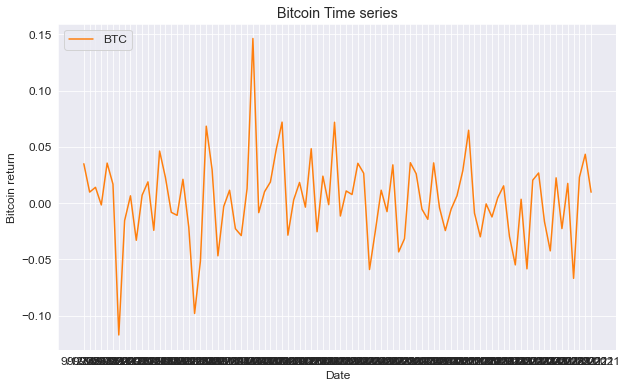

In [79]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(btc_ts.Date, btc_ts.Bit_retrrn, color='tab:orange', label='BTC')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin return')
ax.set_title('Bitcoin Time series')
ax.grid(True)
ax.legend(loc='upper left')

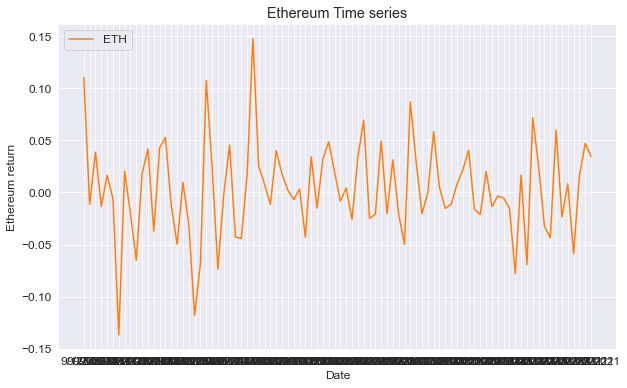

In [73]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(eth_ts.Date, eth_ts.Eth_return, color='tab:orange', label='ETH')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Ethereum return')
ax.set_title('Ethereum Time series')
ax.grid(True)
ax.legend(loc='upper left')